# Capstone TWO - Modeling

## Contents<a id='Contents'></a>
* [Import Packages](#Import_packages)
* [Load Data](#Load_Data)
* [Split Dataset](#Split_Data)
* [Build Models](#Modeling)
    * [LinearRegression Model](#LinearRegression_Model)
        * [Create and fit LinearRegression Model](#Create_fit_LR_Model)
        * [Run Prediction on LinearRegression Model](#Predict_LR_Model)
        * [Review LinearRegression Performance](#Review_LR_Performance)
    * [Random Forest Model](#RandomForest_Model)
        * [Create and fit RandomForest Model](#Create_run_RF_Model)
        * [Run Prediction on Random Forest Model](#Predict_RF_Model)
        * [Review RandomForest Performance](#Review_RF_Performance)
    * [Gradient Boosting Regression Model](#GradientBoosting_Model)
        * [Create and fit Gradient Boosting Regression Model](#Create_run_GB_Model)
        * [Run Prediction on Gradient Boosting Regression Model](#Predict_GB_Model)
        * [Review Gradient Boosting Regression Performance](#Review_GB_Performance)
* [Hyperparameter Tuning](#HyperparameterTuning)
    * [Define the Parameter Gridl](#Define_parameters)
    * [Perform Grid Search and Re-run Models](#Perform_gridSearch)
* [Evaluate Models](#Evaluate)
    * [MSE, RMSE, MAE and R-Squared](#Eval_Metrics)
        * [Linear Regression](#Evaluate_LinearRegression)
        * [Random Forest](#Evaluate_RandomForest)
        * [Gradient Boosting Regressor](#Evaluate_GradientBoost)
    * [Cross Validation](#Eval_CV)
* [Select Model](#Select)

## Import Packages<a id='Import_packages'></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ipywidgets import interact, widgets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Load Data<a id='Load_Data'></a>

In [2]:
dataset = pd.read_csv('modelready_dataset.csv')

In [3]:
dataset.head()

,Fiscal_earned_year,due_month,Check_Amount,Market_category_Facilities and Material,Market_category_Food,Market_category_Pharmaceuticals,Market_category_Services,Contract_freq_encoded,sin_month,cos_month
0,2003,4,15371996.26,1,0,0,0,2,8.660254e-01,-0.500000
1,2003,5,7095134.63,1,0,0,0,2,5.000000e-01,-0.866025
2,2003,6,7324838.75,1,0,0,0,2,1.224647e-16,-1.000000
3,2003,7,7323424.33,1,0,0,0,2,-5.000000e-01,-0.866025
4,2003,8,7321162.74,1,0,0,0,2,-8.660254e-01,-0.500000


In [4]:
dataset.shape

(1331, 10)

## Split Dataset<a id='Split_Data'></a>

In [5]:
# Splitting the data into train and test sets
features = dataset.drop(columns=['Check_Amount'])
target = dataset['Check_Amount']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [6]:
features.shape

(1331, 9)

In [7]:
target.shape

(1331,)

## Build Models<a id='Modeling'> </a>

### Linear Regeression Model<a id='LinearRegression_Model'></a>

#### Create and fit LinearRegression Model<a id = 'Create_fit_LR_Model'></a>

In [8]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

#### Run Prediction on LinearRegression Model<a id = 'Predict_LR_Model'></a>

In [9]:
# Make predictions on the test set
linear_reg_predict = linear_reg_model.predict(X_test)

#### Review Linear Regression Model Performance<a id='Review_LR_Performance'></a>

In [10]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predict)
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predict, squared=False)  
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predict)
linear_reg_r_squared = r2_score(y_test, linear_reg_predict)

In [11]:
print("Mean Squared Error (MSE):", linear_reg_mse)
print("Root Mean Squared Error (RMSE):", linear_reg_rmse)
print("Mean Absolute Error (MAE):", linear_reg_mae)
print("R-squared:", linear_reg_r_squared)

Mean Squared Error (MSE): 3.225368664473901e+16
Root Mean Squared Error (RMSE): 179593114.13508874
Mean Absolute Error (MAE): 114789306.97515635
R-squared: 0.4468910749962395


#### Interpretation
The large values of MSE, RMSE, and MAE suggest that the model's predictions have relatively high errors.
<br>R-squared: The R-squared value of 0.4469 indicates that the model accounts for 44.7% of the variability in the target variable. 

### Random Forest Model<a id = 'RandomForest_Model'><a/>

#### Create and fit RandomForest Model <a id = 'Create_run_RF_Model'></a>

In [12]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Run Prediction on Random Forest Model<a id = 'Predict_RF_Model'></a>

In [13]:
rf_predictions = rf_model.predict(X_test)

#### Review RandomForest Performance<a id = 'Review_RF_Performance'></a>

In [14]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)  
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r_squared = r2_score(y_test, rf_predictions)

In [15]:
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared:", rf_r_squared)

Mean Squared Error (MSE): 4359397539894138.0
Root Mean Squared Error (RMSE): 66025733.92166223
Mean Absolute Error (MAE): 28625374.978309356
R-squared: 0.9252419819937643


#### Interpretation

The relatively low values of MSE, RMSE, and MAE indicate that your model is making better predictions with small errors on average, compared to the Linear Regrerssion Model

R-squared: The high R-squared value (0.9252) indicates the goodness of the fit.

### Gradient Boosting Regression Model<a id='GradientBoosting_Model'></a>

#### Create and fit Gradient Boosting Regression Model <a id = 'Create_run_GB_Model'></a>

In [16]:
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

#### Run Prediction on Gradient Boosting Regression Model<a id = 'Predict_GB_Model'></a>

In [17]:
gb_predictions = gbr_model.predict(X_test)

#### Review Gradient Boosting Regression Performance <a id = 'Review_GB_Performance'></a>

In [18]:
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)  
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r_squared = r2_score(y_test, gb_predictions)

In [19]:
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("Mean Absolute Error (MAE):", gb_mae)
print("R-squared:", gb_r_squared)

Mean Squared Error (MSE): 5541069034991457.0
Root Mean Squared Error (RMSE): 74438357.2829993
Mean Absolute Error (MAE): 41021312.217384
R-squared: 0.9049778473055371


#### Interpretation

The large MSE and RMSE values suggest that there is a considerable amount of variance in the target variable. Predictions seem to have substantial errors.

The MAE indicates that, on average, the model's predictions deviate by approximately 41.02 million units from the actual values.

R-squared value indicates a relatively good fit of the model to the data, explaining 90.5% of the variability in the target variable.

In summary, based on these metrics, Random Forest Model is preferred over Gradient Boost Regression Model as it demonstrates much better performance in terms of prediction accuracy.

## Hyperparameter Tuning <a id = 'HyperparameterTuning'></a>

### Define the Parameter Grid<a id = 'Define_parameters'></a>

In [20]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

### Perform Grid Search and Re-run Models <a id = 'Perform_gridSearch'></a>

#### Random Forest

In [21]:
# Perform GridSearchCV on Random Forest Model
best_gbr_model_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
best_gbr_model_rf.fit(X_train, y_train)

# Access the best hyperparameters
best_params_rf = best_gbr_model_rf.best_params_

# Instantiate a new Random Forest Regressor with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)

# Fit the model on the entire training set
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
best_rf_predictions = best_rf_model.predict(X_test)


# Calculate mean squared error
mse = mean_squared_error(y_test, best_rf_predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5311801676306028.0


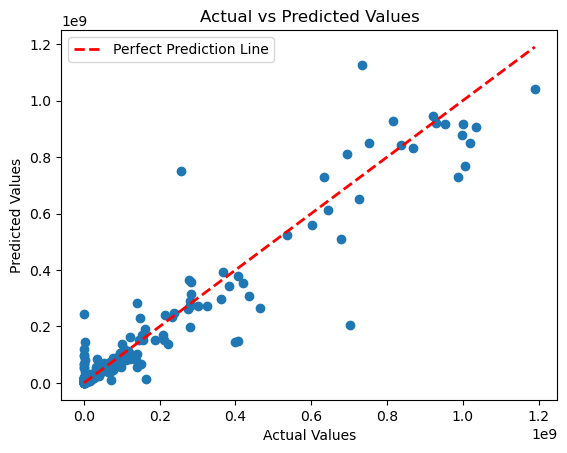

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, best_rf_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction Line')
plt.legend()
plt.show()


#### Gradient Booster Regressor

In [23]:
# Perform GridSearcCV on Gradient Booster Regressor
grid_search_gbr = GridSearchCV(gbr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)

# Access the best hyperparameters
best_params_gbr = grid_search_gbr.best_params_

# Instantiate a new GradientBoostingRegressor with the best hyperparameters
best_gbr_model = GradientBoostingRegressor(**best_params_gbr, random_state=42)

# Fit the model on the entire training set
best_gbr_model.fit(X_train, y_train)

# Make predictions on the test set
best_gbr_predictions = best_gbr_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, best_gbr_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4116830272248714.5


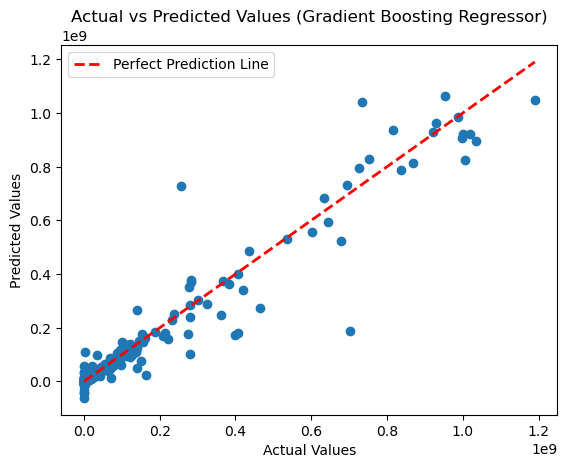

In [24]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, best_gbr_predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting Regressor)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction Line')
plt.legend()
plt.show()


## Evaluate Models<a id='Evaluate'></a>

### MSE, RMSE, MAE and R-Squared<a id = 'Eval_Metrics'></a>

#### Linear Regression<a id='Evaluate_LinearRegression'></a>

In [25]:
print("Mean Squared Error (MSE):", linear_reg_mse)
print("Root Mean Squared Error (RMSE):", linear_reg_rmse)
print("Mean Absolute Error (MAE):", linear_reg_mae)
print("R-squared:", linear_reg_r_squared)

Mean Squared Error (MSE): 3.225368664473901e+16
Root Mean Squared Error (RMSE): 179593114.13508874
Mean Absolute Error (MAE): 114789306.97515635
R-squared: 0.4468910749962395


#### Random Forest<a id='Evaluate_RandomForest'></a>

In [26]:
best_rf_mse = mean_squared_error(y_test, best_rf_predictions)
best_rf_rmse = mean_squared_error(y_test, best_rf_predictions, squared=False)  
best_rf_mae = mean_absolute_error(y_test, best_rf_predictions)
best_rf_r_squared = r2_score(y_test, best_rf_predictions)

In [27]:
print("Random Forest - Mean Squared Error (MSE):", best_rf_mse)
print("Random Forest - Root Mean Squared Error (RMSE):", best_rf_rmse)
print("Random Forest - Mean Absolute Error (MAE):", best_rf_mae)
print("Random Forest - R-squared:", best_rf_r_squared)

Random Forest - Mean Squared Error (MSE): 5311801676306028.0
Random Forest - Root Mean Squared Error (RMSE): 72882108.06711088
Random Forest - Mean Absolute Error (MAE): 31738121.39663324
Random Forest - R-squared: 0.908909485375247


#### Gradient Boosting Regressor <a id='Evaluate_GradientBoost'></a>

In [28]:
best_gbr_mse = mean_squared_error(y_test, best_gbr_predictions)
best_gbr_rmse = mean_squared_error(y_test, best_gbr_predictions, squared=False)  
best_gbr_mae = mean_absolute_error(y_test, best_gbr_predictions)
best_gbr_r_squared = r2_score(y_test, best_gbr_predictions)

In [29]:
print("Gradient Boost - Mean Squared Error (MSE):", best_gbr_mse)
print("Gradient Boost - Root Mean Squared Error (RMSE):", best_gbr_rmse)
print("Gradient Boost - Mean Absolute Error (MAE):", best_gbr_mae)
print("Gradient Boost - R-squared:", best_gbr_r_squared)

Gradient Boost - Mean Squared Error (MSE): 4116830272248714.5
Gradient Boost - Root Mean Squared Error (RMSE): 64162530.12661451
Gradient Boost - Mean Absolute Error (MAE): 26432303.513172578
Gradient Boost - R-squared: 0.9294016962653836


### Cross Validation<a id = 'Eval_CV'></a>

In [30]:
# Perform cross-validation for each model
cross_val_scores_linear_reg = cross_val_score(linear_reg_model, features, target, cv=5, scoring='neg_mean_squared_error')
cross_val_scores_random_forest = cross_val_score(rf_model, features, target, cv=5, scoring='neg_mean_squared_error')
cross_val_scores_gradient_boost = cross_val_score(gbr_model, features, target, cv=5, scoring='neg_mean_squared_error')

# Calculate average scores
average_cv_score_linear_reg = np.mean(cross_val_scores_linear_reg)
average_cv_score_random_forest = np.mean(cross_val_scores_random_forest)
average_cv_score_gradient_boost = np.mean(cross_val_scores_gradient_boost)

# Print or display average scores
print("Average Cross-Validation Score - Linear Regression:", average_cv_score_linear_reg)
print("Average Cross-Validation Score - Random Forest:", average_cv_score_random_forest)
print("Average Cross-Validation Score - Gradient Boost:", average_cv_score_gradient_boost)

Average Cross-Validation Score - Linear Regression: -3.410899581526e+16
Average Cross-Validation Score - Random Forest: -1.0708064624790602e+16
Average Cross-Validation Score - Gradient Boost: -1.2140556734838114e+16


Comparing the scores among models: The model with the least negative score is generally considered better. In this case, the Linear Regression model seems to have the lowest average cross-validation score among the three

## Select Model<a id='Select'></a>

| Model             | MSE               | RMSE              | MAE              | R-squared          | Cross-Validation Score  |
|-------------------|-------------------|-------------------|------------------|--------------------|-------------------------|
| Linear Regression | 3.23e+16          | 1.80e+08          | 1.15e+08         | 0.447              | -3.41e+16               |
| Random Forest     | 5.31e+15          | 7.29e+07          | 3.17e+07         | 0.909              | -1.07e+16               |
| Gradient Boost    | 4.12e+15          | 6.42e+07          | 2.64e+07         | 0.929              | -1.21e+16               |



* **MSE and RMSE**: Smaller values are better, indicating lower prediction errors. Here, Random Forest and Gradient Boost have lower MSE and RMSE compared to Linear Regression, suggesting better performance.

* **MAE**: Smaller values are better, indicating lower average prediction errors. Random Forest and Gradient Boost have lower MAE compared to Linear Regression.

* **R-squared**: Closer to 1 is better, indicating a better fit to the data. Here, Gradient Boost has the highest R-squared, suggesting it explains more variance in the target variable.

* **Cross-Validation Score**: More negative values are better, indicating lower prediction errors during cross-validation. All models have similar magnitudes, but Random Forest has the least negative cross-validation score.

Based on these metrics, **Gradient Boost Regressor** seems to be the best-performing model, followed by Random Forest. 
Linear Regression seems to have higher prediction errors compared to the ensemble models. 